<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

<img src="../images/pandas.svg" style="width: 400px;">

# Time series analysis (Pandas)


Nikolay Koldunov

koldunovn@gmail.com

## Module import

First we have to import necessary modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better


In [2]:
pd.__version__

'1.3.0'

## Loading data

Now, when we are done with preparations, let's get some data.

Pandas has very good IO capabilities and we are going to use them to load our data and convert it to the time series.

You remember our Hamburg temperature file:

In [8]:
!head ../data/Ham_3column.txt

1891    1    1  -72
1891    1    2  -43
1891    1    3  -32
1891    1    4   12
1891    1    5  -29
1891    1    6  -43
1891    1    7  -37
1891    1    8  -97
1891    1    9  -99
1891    1   10  -89


We can certainly load it with numpy:

In [14]:
temp = np.loadtxt('../data/Ham_3column.txt')

In [15]:
temp

array([[1891.,    1.,    1.,  -72.],
       [1891.,    1.,    2.,  -43.],
       [1891.,    1.,    3.,  -32.],
       ...,
       [2014.,    8.,   29.,  216.],
       [2014.,    8.,   30.,  198.],
       [2014.,    8.,   31.,  184.]])

Bit, say we would like to select specific year:

In [17]:
temp[temp[:,0]==2014]

array([[2014.,    1.,    1.,   67.],
       [2014.,    1.,    2.,   91.],
       [2014.,    1.,    3.,   97.],
       [2014.,    1.,    4.,   77.],
       [2014.,    1.,    5.,   72.],
       [2014.,    1.,    6.,  106.],
       [2014.,    1.,    7.,  115.],
       [2014.,    1.,    8.,   95.],
       [2014.,    1.,    9.,  119.],
       [2014.,    1.,   10.,   72.],
       [2014.,    1.,   11.,   59.],
       [2014.,    1.,   12.,   65.],
       [2014.,    1.,   13.,   65.],
       [2014.,    1.,   14.,   62.],
       [2014.,    1.,   15.,   38.],
       [2014.,    1.,   16.,   56.],
       [2014.,    1.,   17.,   81.],
       [2014.,    1.,   18.,   81.],
       [2014.,    1.,   19.,   47.],
       [2014.,    1.,   20.,   -1.],
       [2014.,    1.,   21.,  -12.],
       [2014.,    1.,   22.,  -16.],
       [2014.,    1.,   23.,  -31.],
       [2014.,    1.,   24.,  -50.],
       [2014.,    1.,   25.,  -87.],
       [2014.,    1.,   26.,  -84.],
       [2014.,    1.,   27.,   46.],
 

In [25]:
year2000 = temp[temp[:,0]==2000]
year2000[year2000[:,1]==3]

array([[2000.,    3.,    1.,   83.],
       [2000.,    3.,    2.,   65.],
       [2000.,    3.,    3.,   85.],
       [2000.,    3.,    4.,   33.],
       [2000.,    3.,    5.,   42.],
       [2000.,    3.,    6.,   77.],
       [2000.,    3.,    7.,  123.],
       [2000.,    3.,    8.,  121.],
       [2000.,    3.,    9.,  115.],
       [2000.,    3.,   10.,   63.],
       [2000.,    3.,   11.,   80.],
       [2000.,    3.,   12.,   68.],
       [2000.,    3.,   13.,   76.],
       [2000.,    3.,   14.,   90.],
       [2000.,    3.,   15.,   67.],
       [2000.,    3.,   16.,   81.],
       [2000.,    3.,   17.,   83.],
       [2000.,    3.,   18.,   59.],
       [2000.,    3.,   19.,  105.],
       [2000.,    3.,   20.,   72.],
       [2000.,    3.,   21.,   67.],
       [2000.,    3.,   22.,  121.],
       [2000.,    3.,   23.,  105.],
       [2000.,    3.,   24.,   96.],
       [2000.,    3.,   25.,  133.],
       [2000.,    3.,   26.,   85.],
       [2000.,    3.,   27.,   85.],
 

## Exersise

Finish the code below, so that result (`monmean` variable) is monthly means for the year 2000:

In [37]:
year2000 = temp[temp[:,0]==2000]
monmean = []
for mon in range(1,13):
    mm = ......
    monmean.append(mm)

There should be a better way to do this things :)

Let's use similar data, but for a different location for a change:

In [20]:
!head -n 30 ../data/Bremen_tmax.txt

# Searching for GHCND series nr GM000001474
# coordinates:  53.10N,    8.78E,      4.0m; GHCN-D station code: GM000001474 BREMEN-SEEFAHRTSCHULE Germany
# WMO station 10224
# institution :: NOAA/NCEI
# source_url :: https://catalog.data.gov/dataset/global-historical-climatology-network-daily-ghcn-daily-version-3
# source_doi :: https://doi.org/10.7289/V5D21VHZ
# contact_email :: ncdc.ghcnd@noaa.gov
# reference :: Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.
# license :: U.S. Government Work. The non-U.S. data cannot be redistributed within or outside of the U.S. for any commercial activities.
# station_code :: GM000001474
# station_name :: BREMEN-SEEFAHRTSCHULE
# station_country :: Germany
# wmo_code :: 10224
# latitude ::   53.10 degrees_north
# longitude ::    8.78 degrees_east
# elevation :: 

In [21]:
tmax = pd.read_csv('../data/Bremen_tmax.txt',skiprows=22,
                   delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)

In [22]:
tmax

,0_1_2,3
0,1890-01-02,-3.3
1,1890-01-03,-1.3
2,1890-01-04,5.7
3,1890-01-05,7.7
4,1890-01-06,9.6
...,...,...
47681,2021-05-27,15.2
47682,2021-05-28,17.8
47683,2021-05-29,15.1
47684,2021-05-30,20.0


Here we read our data from file, telling pandas, that delimiter is a space, that it has to combine information in the 0th, 1st and 2nd columns and try to understand it as a date, and that there is no header presented in the original data.

In [24]:
tmax

,0_1_2,3
0,1890-01-02,-3.3
1,1890-01-03,-1.3
2,1890-01-04,5.7
3,1890-01-05,7.7
4,1890-01-06,9.6
...,...,...
47681,2021-05-27,15.2
47682,2021-05-28,17.8
47683,2021-05-29,15.1
47684,2021-05-30,20.0


Rename columns:

In [25]:
tmax.columns = ['Date', 'Temp']

Set "Date" column to be our index (instead of 1,2,3....), so pandas can understand, that our data is actually a time series.

In [26]:
tmax = tmax.set_index(['Date'])

In [27]:
tmax.head(3)

,Temp
Date,
1890-01-02,-3.3
1890-01-03,-1.3
1890-01-04,5.7


Now we can plot the complete time series:

<AxesSubplot:xlabel='Date'>

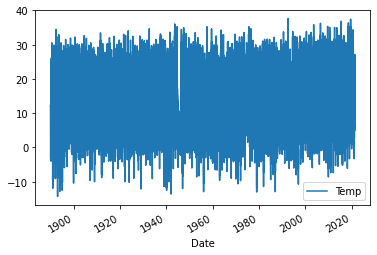

In [28]:
tmax.plot()

or its part:

<AxesSubplot:xlabel='Date'>

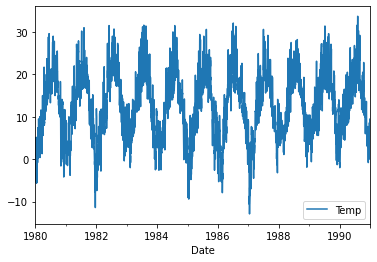

In [29]:
tmax.loc['1980':'1990'].plot()

or even smaller part:

<AxesSubplot:xlabel='Date'>

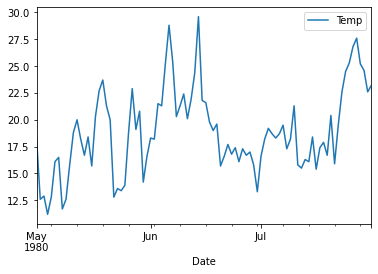

In [30]:
tmax.loc['1980-05':'1980-07'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By index (date in our case): 

In [31]:
tmax.loc['1980-01-02':'1980-01-02']

,Temp
Date,
1980-01-02,0.4


By exact location:

In [32]:
tmax.iloc[120]

Temp    22.1
Name: 1890-05-02 00:00:00, dtype: float64

And what if we choose only one month?

<AxesSubplot:xlabel='Date'>

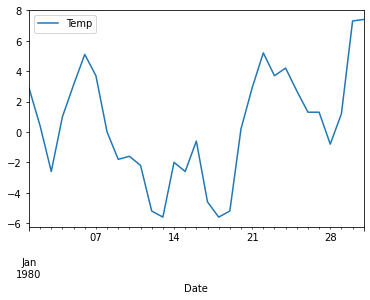

In [35]:
tmax.loc['1980-01'].plot()

Isn't that great? :)

## Exercise

What was temperature in Delhi at your burthsday (or at the closest day)?

## We can select data by condidtion

This is a plot of all temperatures larger than 35 degrees Celsius.

<AxesSubplot:xlabel='Date'>

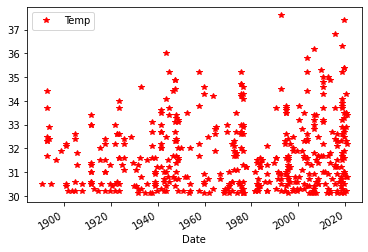

In [38]:
tmax[tmax > 30].plot(style='r*')

## Exercise

- plot all temperatures larger than 10 (red stars)
- plot temperatires lower than 10 (blue stars)
- limit both plots by 1990-2013 period

## Multiple columns

Now let's make live a bit more interesting and get more data. This will be TMIN time series.

In [40]:
tmin = pd.read_csv('../data/Bremen_tmin.txt',skiprows=22,
                   delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tmin.columns = ['Date', 'Temp']
tmin = tmin.set_index(['Date'])

<AxesSubplot:xlabel='Date'>

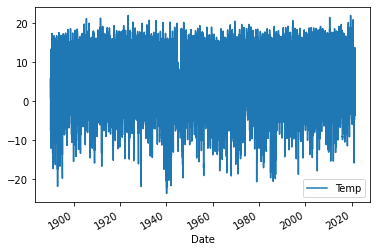

In [41]:
tmin.plot()

Note, that number of values in `tmin` and `tmax` are not the same:

In [42]:
tmin.describe()

,Temp
count,47687.000000
mean,5.307698
std,6.266547
min,-23.600000
25%,0.900000
50%,5.500000
75%,10.200000
max,22.000000


In [43]:
tmax.describe()

,Temp
count,47686.000000
mean,12.967594
std,8.044124
min,-14.300000
25%,6.900000
50%,13.000000
75%,19.100000
max,37.600000


We are going to create empty DataFrame with indeces for every day and then fill them in with TMIN and TMAX (where they are exist) 

Create index (use period_range):

In [46]:
tmin

,Temp
Date,
1890-01-02,-7.4
1890-01-03,-3.5
1890-01-04,-1.9
1890-01-05,0.2
1890-01-06,6.0
...,...
2021-05-27,8.4
2021-05-28,5.9
2021-05-29,5.1


In [47]:
dd = pd.date_range('1890-01','2021-05-31',freq='D')

In [48]:
dd

DatetimeIndex(['1890-01-01', '1890-01-02', '1890-01-03', '1890-01-04',
               '1890-01-05', '1890-01-06', '1890-01-07', '1890-01-08',
               '1890-01-09', '1890-01-10',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', length=47998, freq='D')

Create empty data frame:

In [49]:
tmp = pd.DataFrame(index=dd)

In [50]:
tmp

""
1890-01-01
1890-01-02
1890-01-03
1890-01-04
1890-01-05
...
2021-05-27
2021-05-28
2021-05-29
2021-05-30


Convert indexes from date time values to periods:

In [51]:
# tmin.index = tmin.index.to_period('D')
# tmax.index = tmax.index.to_period('D')

Now we create Data Frame, that will contain both TMAX and TMIN data. It is sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [52]:
tmp['TMIN'] = tmin
tmp['TMAX'] = tmax

In [53]:
tmp.head()

,TMIN,TMAX
1890-01-01,NaN,NaN
1890-01-02,-7.4,-3.3
1890-01-03,-3.5,-1.3
1890-01-04,-1.9,5.7
1890-01-05,0.2,7.7


One can plot the data straight away:

<AxesSubplot:>

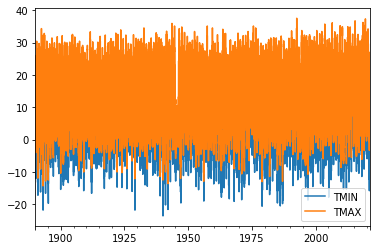

In [57]:
tmp.plot()

<AxesSubplot:>

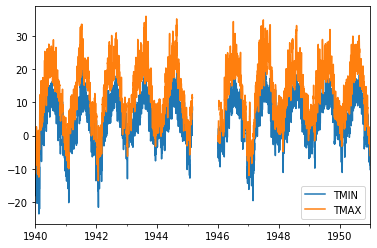

In [58]:
tmp.loc['1940':'1950'].plot()

We can reference each column by its name:

<AxesSubplot:>

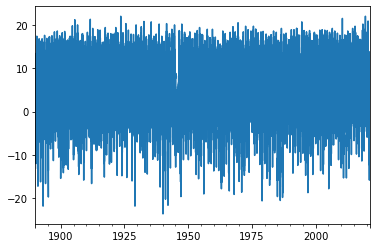

In [59]:
tmp['TMIN'].plot()

or as a method of the Data Frame variable (if name of the variable is a valid python name):

<AxesSubplot:>

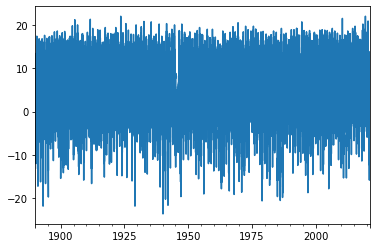

In [60]:
tmp.TMIN.plot()

We can simply add column to the Data Frame:

In [61]:
tmp['mean'] = (tmp['TMAX'] + tmp['TMIN'])/2.
tmp.head()

,TMIN,TMAX,mean
1890-01-01,NaN,NaN,NaN
1890-01-02,-7.4,-3.3,-5.35
1890-01-03,-3.5,-1.3,-2.40
1890-01-04,-1.9,5.7,1.90
1890-01-05,0.2,7.7,3.95


In [62]:
tmp['Diff'] = tmp['TMAX'] - tmp['TMIN']
tmp.head()

,TMIN,TMAX,mean,Diff
1890-01-01,NaN,NaN,NaN,NaN
1890-01-02,-7.4,-3.3,-5.35,4.1
1890-01-03,-3.5,-1.3,-2.40,2.2
1890-01-04,-1.9,5.7,1.90,7.6
1890-01-05,0.2,7.7,3.95,7.5


## Exercise
Find and plot all differences that are larger than 10

And delete it:

In [63]:
del tmp['Diff']
del tmp['mean']
tmp.tail()

,TMIN,TMAX
2021-05-27,8.4,15.2
2021-05-28,5.9,17.8
2021-05-29,5.1,15.1
2021-05-30,2.2,20.0
2021-05-31,8.4,22.8


Slicing will also work:

<AxesSubplot:>

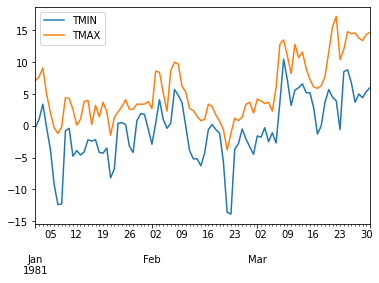

In [64]:
tmp.loc['1981-01':'1981-03'].plot()

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [65]:
tmp.mean()

TMIN     5.307698
TMAX    12.967594
dtype: float64

In [66]:
tmp.max()

TMIN    22.0
TMAX    37.6
dtype: float64

In [67]:
tmp.min()

TMIN   -23.6
TMAX   -14.3
dtype: float64

You can also do it row-wise:

In [68]:
tmp.mean(1)

1890-01-01      NaN
1890-01-02    -5.35
1890-01-03    -2.40
1890-01-04     1.90
1890-01-05     3.95
              ...  
2021-05-27    11.80
2021-05-28    11.85
2021-05-29    10.10
2021-05-30    11.10
2021-05-31    15.60
Freq: D, Length: 47998, dtype: float64

Or get everything at once:

In [69]:
tmp.describe()

,TMIN,TMAX
count,47687.000000,47686.000000
mean,5.307698,12.967594
std,6.266547,8.044124
min,-23.600000,-14.300000
25%,0.900000,6.900000
50%,5.500000,13.000000
75%,10.200000,19.100000
max,22.000000,37.600000


By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [70]:
tmp.corr()

,TMIN,TMAX
TMIN,1.00000,0.89077
TMAX,0.89077,1.00000


## Exercise

Find means of all TMIN and TMAX temperatures larger than 20

## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates monthly ('M'):

In [76]:
tmp.resample?

<AxesSubplot:>

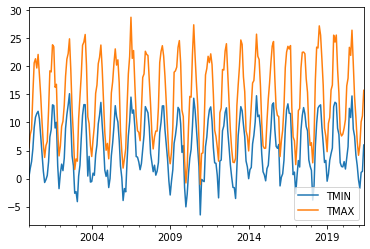

In [71]:
tmp_mm = tmp.resample("M").mean()
tmp_mm['2000':].plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

<AxesSubplot:>

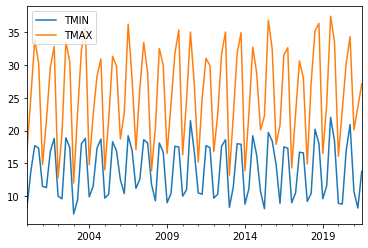

In [72]:
tmp_mm = tmp.resample("3M").apply(np.max)
tmp_mm['2000':].plot()

You can specify several functions at once as a list:

<AxesSubplot:>

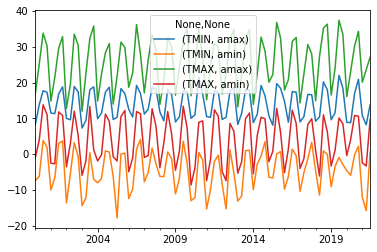

In [73]:
tmp_mm = tmp.resample("3M").apply([np.max, np.min])
tmp_mm['2000':].plot()

## Exercise

Define function that will find difference between maximum and minimum values of the resampled slice, and resample our `tmp` variable with this function.

## Seasonal means with resample

Initially pandas was created for analysis of financial information and it thinks not in seasons, but in quarters. So we have to resample our data to quarters. We also need to make a shift from standard quarters, so they correspond with seasons. This is done by using 'Q-NOV' as a time frequency, indicating that year in our case ends in November:

In [74]:
q_mean = tmp.resample('Q-NOV').mean()
q_mean

,TMIN,TMAX
1890-02-28,-1.098276,4.532759
1890-05-31,4.202174,13.568478
1890-08-31,11.234783,19.967391
1890-11-30,5.860440,12.114286
1891-02-28,-4.986667,0.065556
...,...,...
2020-05-31,3.702174,14.958696
2020-08-31,12.713043,23.952174
2020-11-30,6.859341,15.189011
2021-02-28,0.191111,5.557778


<AxesSubplot:>

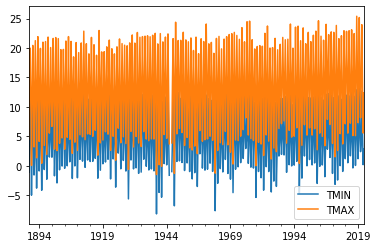

In [75]:
q_mean.plot()

Plot winters

<AxesSubplot:>

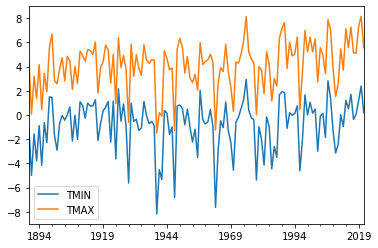

In [76]:
q_mean[q_mean.index.quarter==1].plot()

## Multi-year monthly means with groupby

First step will be to add another column to our DataFrame with month numbers:

In [77]:
tmp['mon'] = tmp.index.month
tmp

,TMIN,TMAX,mon
1890-01-01,NaN,NaN,1
1890-01-02,-7.4,-3.3,1
1890-01-03,-3.5,-1.3,1
1890-01-04,-1.9,5.7,1
1890-01-05,0.2,7.7,1
...,...,...,...
2021-05-27,8.4,15.2,5
2021-05-28,5.9,17.8,5
2021-05-29,5.1,15.1,5
2021-05-30,2.2,20.0,5


Now we can use [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to group our values by months and calculate mean for each of the groups (month in our case):

<AxesSubplot:xlabel='mon'>

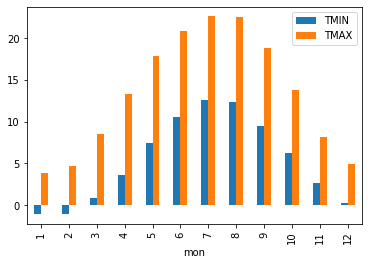

In [79]:
monmean = tmp['1950':'2020'].groupby('mon').aggregate(np.mean)
monmean.plot(kind='bar')

<AxesSubplot:title={'center':'TMIN'}, xlabel='mon'>

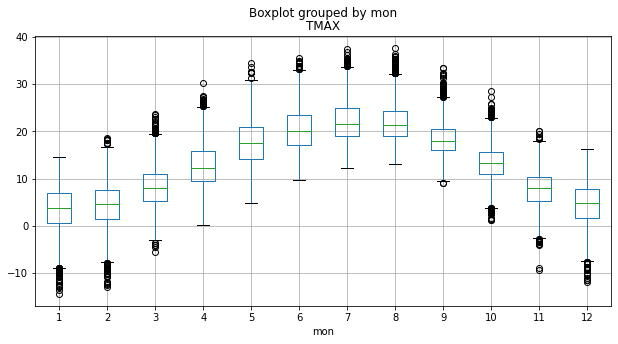

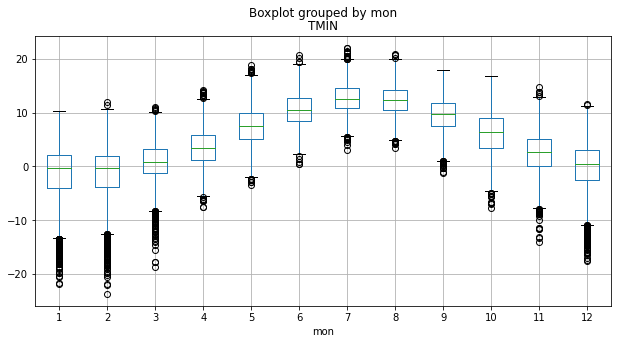

In [80]:
tmp.boxplot(column=['TMAX'], by='mon', figsize=(10,5))
tmp.boxplot(column=['TMIN'], by='mon', figsize=(10,5))

## Exersise

The data that we are using are from [GHCN (Global Historical Climatology Network)-Daily](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn). The easiest way to search and extract those data is to use [KNMI Climatological Service](http://climexp.knmi.nl/selectdailyseries.cgi?id).

- Use [KNMI Climatological Service](http://climexp.knmi.nl/selectdailyseries.cgi?id) to search for some other meteo station.
- Select TMAX data set for your home city or nearby place.
- Open it with pandas.
- Plot data for 2000-2010.
- Find maximum and minimum TMAX for all observational period.
- Find mean of the TMAX temperature.
- Plot monthly means.
- Plot maximum/minimum temperatures for each month.
- Plot seasonal mean for one of the seasons.
- Plot overall monthly means (use groupby(data.index.month)).
- Plot daily season cycle ( use index.dayofyear ).

## Links

[Time Series Data Analysis with pandas (Video)](http://www.youtube.com/watch?v=0unf-C-pBYE)

[Data analysis in Python with pandas (Video)](http://www.youtube.com/watch?v=w26x-z-BdWQ)

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)